In [1]:
from scipy import stats
from scipy.stats import pearsonr, kendalltau

srcc = stats.spearmanr( [0.6480761, 0.62233955, 0.6661059, 0.631339, 0.6192408, 0.641552, 0.6423639, 0.7225227, 0.65772206, 0.63077545, 0.54655486  , 0.6763791, 0.62823856, 0.63159883, 0.62590545, 0.65006614, 0.6068853, 0.63621056, 0.5723472, 0.6442189, 0.62065214, 0.67560524, 0.6549503, 0.61165047], [0.062, 0.032, 0.029, 0.028, 0.027, 0.104, 0.028, 0.006, 0.033, 0.088, 0.052, 0.014, 0.029, 0.032, 0.022, 0.0, 0.012, 0.04, 0.051, 0.003, 0.032, 0.031, 0.019, 0.042])
srcc0 = pearsonr( [0.6480761, 0.62233955, 0.6661059, 0.631339, 0.6192408, 0.641552, 0.6423639, 0.7225227, 0.65772206, 0.63077545, 0.54655486  , 0.6763791, 0.62823856, 0.63159883, 0.62590545, 0.65006614, 0.6068853, 0.63621056, 0.5723472, 0.6442189, 0.62065214, 0.67560524, 0.6549503, 0.61165047], [0.062, 0.032, 0.029, 0.028, 0.027, 0.104, 0.028, 0.006, 0.033, 0.088, 0.052, 0.014, 0.029, 0.032, 0.022, 0.0, 0.012, 0.04, 0.051, 0.003, 0.032, 0.031, 0.019, 0.042])
srcc1 = kendalltau( [0.6480761, 0.62233955, 0.6661059, 0.631339, 0.6192408, 0.641552, 0.6423639, 0.7225227, 0.65772206, 0.63077545, 0.54655486  , 0.6763791, 0.62823856, 0.63159883, 0.62590545, 0.65006614, 0.6068853, 0.63621056, 0.5723472, 0.6442189, 0.62065214, 0.67560524, 0.6549503, 0.61165047], [0.062, 0.032, 0.029, 0.028, 0.027, 0.104, 0.028, 0.006, 0.033, 0.088, 0.052, 0.014, 0.029, 0.032, 0.022, 0.0, 0.012, 0.04, 0.051, 0.003, 0.032, 0.031, 0.019, 0.042])

srcc[0],srcc0[0],srcc1[0]

(-0.3369615411989142, -0.31079259594045033, -0.23766989273624328)

In [2]:
import torch
print(torch.cuda.get_device_name(0))
print(torch.cuda.is_available())


NVIDIA GeForce GTX 1050
True


In [3]:
%cd ..


d:\quality_assessment\knowledge_distillation\cvr-iqa\CVRKD-IQA


In [4]:
from test_DistillationIQA_single import DistillationIQASolver


obj_org = DistillationIQASolver(net_mode="org",student_address='./model_zoo/NAR_student_cross_dataset.pth')

normal mode...
>>>>>  ./model_zoo/NAR_student_cross_dataset.pth


In [5]:
obj_stackV1 = DistillationIQASolver(net_mode="stackingV1",student_address='./model_zoo/stacking_ep98_saved_student_model.pth')

stacking modeV1...
>>>>>  ./model_zoo/stacking_ep98_saved_student_model.pth


In [6]:
obj_stackV2 = DistillationIQASolver(net_mode="stackingV2",student_address='./model_zoo/stackingV2-ep70.pth')

stacking modeV2(combined)...
>>>>>  ./model_zoo/stackingV2-ep70.pth


In [7]:
obj_4loss = DistillationIQASolver(net_mode="stackingV2",student_address='./model_zoo/4loss_ep+26_5.pth')

stacking modeV2(combined)...
>>>>>  ./model_zoo/4loss_ep+26_5.pth


# dst:

In [9]:
import random , glob

def get_random_HR_images():
    all_images = glob.glob('D:\quality_assessment\knowledge_distillation\cvr-iqa\CVRKD-IQA\dataset\DIV2K_ref/val_HR/*')
    return random.sample(all_images, 1)[0]


get_random_HR_images()

'D:\\quality_assessment\\knowledge_distillation\\cvr-iqa\\CVRKD-IQA\\dataset\\DIV2K_ref/val_HR\\0853.png'

all imgs


In [8]:
def calculate_std(data):
    if len(data) == 0:
        return 0
    mean = sum(data) / len(data)
    variance = sum((x - mean) ** 2 for x in data) / len(data)
    std = variance ** 0.5
    return std



calculate_std([11,11,11,11,11,11,11,10])

0.33071891388307384

In [18]:
import glob

all_tid_images = glob.glob("dataset/TID2013/distorted_images/*.bmp")
len(all_tid_images)

3000

In [35]:
li = []

for i in range(10):
    li.append(obj_stackV2.cvr_on_single_image(all_tid_images[764] ,get_random_HR_images()))

calculate_std(li)


0.09795001094733063

In [38]:
import random
import string
from tqdm import tqdm


def generate_random_filename(num,extension=".txt"):
    letters = string.ascii_lowercase
    random_name = "".join(random.choice(letters) for i in range(8))
    return str(num)+"_"+random_name + extension


for i in range(2):
    random_filename = generate_random_filename(i)
    with open(random_filename, 'w') as file:
        for im in tqdm(all_tid_images):
            sc = obj_stackV2.cvr_on_single_image(im ,get_random_HR_images())
            file.write(f"{sc:.3f} {im}\n")
            



 19%|█▉        | 579/3000 [07:15<45:50,  1.14s/it]  

In [37]:
import os

# Directory containing the txt files
directory = "S17_variance_test/tid13_50times"

# List to store the names of txt files
txt_files = []

# Iterate over the files in the directory
for filename in os.listdir(directory):
    if filename.endswith(".txt"):
        txt_files.append(filename)

# Print the list of txt files
print(len(txt_files))
# txt_files


51


In [41]:
# Directory containing the txt files
directory = "S17_variance_test/tid13_50times"
from tqdm import tqdm
# List to store the first line values

all_stds = []
# Iterate over the txt files
for i in tqdm(range(3000)):
    first_line_values = []

    for filename in txt_files:
        with open(os.path.join(directory, filename), 'r') as file:
            for j in range(i):
                file.readline()
            first_line = file.readline().strip()
            if first_line:
                value = first_line.split()[0]
                first_line_values.append(float(value))

    all_stds.append(calculate_std(first_line_values))
# Print the list of first line values







100%|██████████| 3000/3000 [02:46<00:00, 18.03it/s]


In [62]:
# Function to read a txt file and return its contents as a list
def read_txt_to_list(file_path):
    with open(file_path, 'r') as file:
        lines = file.readlines()
    return [line.strip() for line in lines]

# Example usage
file_path = "dataset/TID2013/mos.txt"
file_contents = read_txt_to_list(file_path)
# print(file_contents)
# Convert the list of strings to a list of floats
file_contents = [float(value) for value in file_contents]
print(len(file_contents))



3000


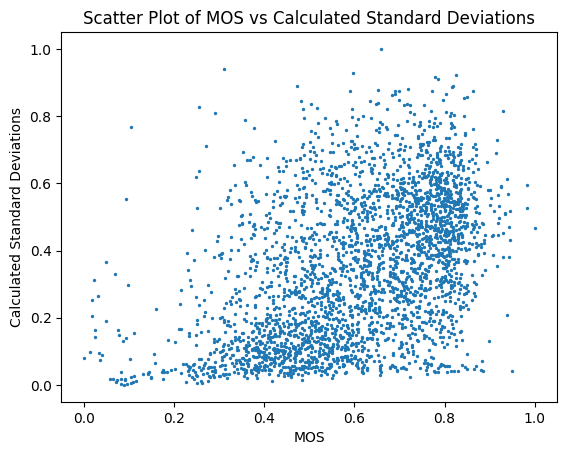

Correlation between MOS and Calculated Standard Deviations: 0.4540682442687308


In [64]:
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

# Assuming `all_stds` is the list of standard deviations calculated earlier
# and `file_contents` is the list of MOS standard deviations from the txt file
# Normalize the lists
file_contents1 = [(x - min(file_contents)) / (max(file_contents) - min(file_contents)) for x in file_contents]
all_stds1 = [(x - min(all_stds)) / (max(all_stds) - min(all_stds)) for x in all_stds]

# Plot scatter plot
plt.scatter(file_contents1, all_stds1, s= 2)
plt.xlabel('MOS')
plt.ylabel('Calculated Standard Deviations')
plt.title('Scatter Plot of MOS vs Calculated Standard Deviations')
plt.show()

# Compute correlation
correlation, _ = pearsonr(file_contents1, all_stds1)
print(f'Correlation between MOS and Calculated Standard Deviations: {correlation}')
# Plot scatter plot with small points
# plt.scatter(file_contents1, all_stds1, s=10)  # s parameter sets the size of the points
# plt.xlabel('MOS Standard Deviations')
# plt.ylabel('Calculated Standard Deviations')
# plt.title('Scatter Plot of MOS vs Calculated Standard Deviations')
# plt.show()



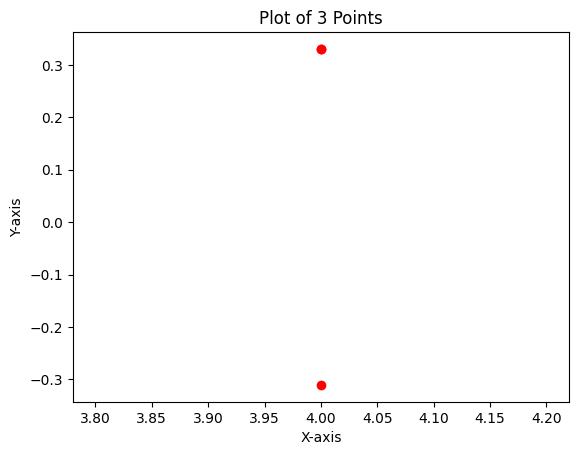

In [53]:
import matplotlib.pyplot as plt

# Coordinates of the 3 points
points = [(3369615411989142, -0.31079259594045033), 
          (-0.23766989273624328, 0.33071891388307384), 
          (0.09795001094733063, 0.33071891388307384)]

# Unzip the points into two lists: x and y coordinates
x_coords, y_coords = zip(*points)
x_coords = [4,4,4]
# Plot the points
plt.scatter(x_coords, y_coords, color='red')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Plot of 3 Points')
plt.show()
